In [1]:
%config IPCompleter.use_jedi=False

In [2]:
%pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

# import the data of ford go bike

In [4]:
df = pd.read_csv('./data/201902-fordgobike-tripdata.csv',parse_dates=['start_time', 'end_time'])
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# check and clean the date from nulls and nan values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [6]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

# check and clean from duplicates

In [9]:
df.duplicated().any()

False

In [10]:
# add new columns for trip start date in year - month - day formate and new 3 columns for the hour , day and month
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hour'] = df.start_time.dt.strftime('%H')
df['start_day'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%B')

weekday = [ 'Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekdaycategories = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_day'] = df['start_day'].astype(weekdaycategories)

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcategories = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df['start_month'] = df['start_month'].astype(monthcategories)

hours = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
hourscategories = pd.api.types.CategoricalDtype(ordered=True, categories=hours)
df['start_hour'] = df['start_hour'].astype(hourscategories)

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_hour,start_day,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,17,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,23,Thursday,February
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019-02-28,23,Thursday,February


In [11]:
# create new colomns called age and remove the outliers of ages column

df['age'] = 2021- df.member_birth_year
df.age = df.age.astype(int)
df=df[df['age']<70]

In [12]:
# remove the outliers of duration column

max_duration= df['duration_sec'].quantile(0.95)
min_duration= df['duration_sec'].quantile(0.05)
df = df[(df['duration_sec'] < max_duration) & (df['duration_sec'] > min_duration)]

In [13]:
# get the duration in both hours and minutes

df['duration_hr'] = df['duration_sec']/3600
df.duration_hr = df.duration_hr.astype(int)

In [14]:
df['duration_min'] = df['duration_sec']/60
df.duration_min = df.duration_min.astype(int)

In [15]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_hour,start_day,start_month,age,duration_hr,duration_min
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,1983.0,Female,No,2019-02-28,23,Thursday,February,38,0,19
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,1992.0,Male,No,2019-02-28,23,Thursday,February,29,0,17
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,1996.0,Female,Yes,2019-02-28,23,Thursday,February,25,0,7
11,506,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343.0,Bryant St at 2nd St,37.783172,...,1993.0,Male,No,2019-02-28,23,Thursday,February,28,0,8
12,1176,2019-02-28 23:45:12.651,2019-03-01 00:04:49.184,127.0,Valencia St at 21st St,37.756708,-122.421025,323.0,Broadway at Kearny,37.798014,...,1990.0,Male,No,2019-02-28,23,Thursday,February,31,0,19


In [16]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age,duration_hr,duration_min
count,156464.000000,156464.000000,156464.000000,156464.000000,156464.000000,156464.000000,156464.000000,156464.000000,156464.000000,156464.000000,156464.0,156464.000000
mean,577.379902,137.247086,37.771068,-122.352632,134.423720,37.771256,-122.352096,4487.368717,1985.032691,35.967309,0.0,9.130925
std,299.810227,111.030992,0.099684,0.117113,110.430843,0.099577,0.116606,1656.033121,9.481240,9.481240,0.0,5.005289
min,167.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1952.000000,20.000000,0.0,2.000000
25%,341.000000,47.000000,37.770407,-122.411738,43.000000,37.770407,-122.411306,3810.000000,1980.000000,29.000000,0.0,5.000000
50%,511.000000,101.000000,37.780526,-122.398279,98.000000,37.780955,-122.397405,4962.000000,1987.000000,34.000000,0.0,8.000000
75%,752.000000,238.000000,37.797280,-122.287610,223.000000,37.797280,-122.289370,5506.000000,1992.000000,41.000000,0.0,12.000000
max,1529.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,69.000000,0.0,25.000000


In [17]:
def plot_count_plot(data , x, color , title):
    
    sb.countplot(data=data , x=x, color= color);
    plt.title(title);

## how many user in each gender? 

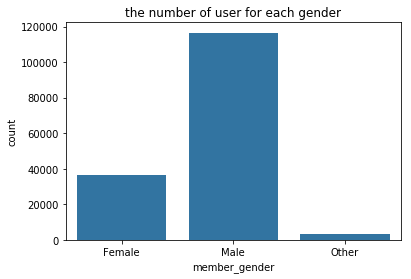

In [18]:


plot_count_plot(df , 'member_gender', sb.color_palette()[0] , title='the number of user for each gender')


### conclution:  most of the users or members are males

## how many subscriber are in the users and which one is larger customer or subscribers?

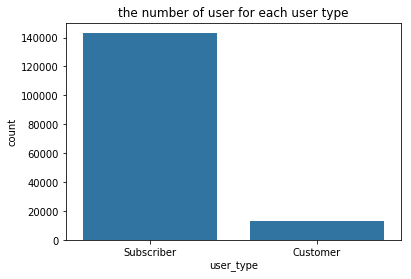

In [19]:
# plt.rcParams['figure.figsize'] = 5,5;

# sb.countplot(data=df , x='user_type', color= sb.color_palette()[0]);

# plt.title('the number of user for each user type');

plot_count_plot(df , 'user_type', sb.color_palette()[0] , title='the number of user for each user type')


### conclution: most of the users are subscribers 

## are most of the user do bike share for trip or not?

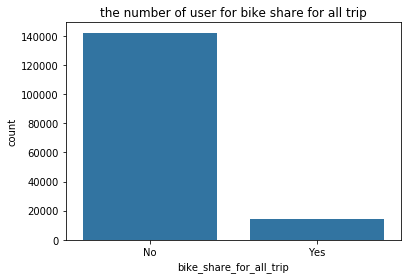

In [20]:
# plt.rcParams['figure.figsize'] = 5,5;
# sb.countplot(data=df , x='bike_share_for_all_trip', color= sb.color_palette()[0]);
# plt.title('the number of user for bike share for all trip');

plot_count_plot(df , 'bike_share_for_all_trip', sb.color_palette()[0] , title='the number of user for bike share for all trip')


### conclution: most of bike share for all trip are NO

## which age are the most who use our bikes?

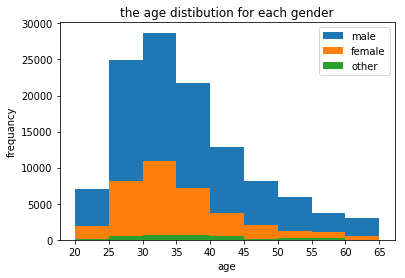

In [21]:
fig , ax = plt.subplots()

bins = np.arange(df['age'].min(), df['age'].max() ,5)
ax.hist(df[df['member_gender'] == 'Male']['age'], bins=bins,label = 'male');
ax.hist(df[df['member_gender'] == 'Female']['age'], bins=bins,label = 'female');
ax.hist(df[df['member_gender'] == 'Other']['age'], bins=bins,label = 'other');
ax.legend()
plt.ylabel('frequancy')
plt.xlabel('age')
plt.xticks(bins , bins);
plt.title('the age distibution for each gender');

### most of the users are between 30 and 35 years old for all the gender types

## over the week days is there a difference in duration between the user type or the genders?


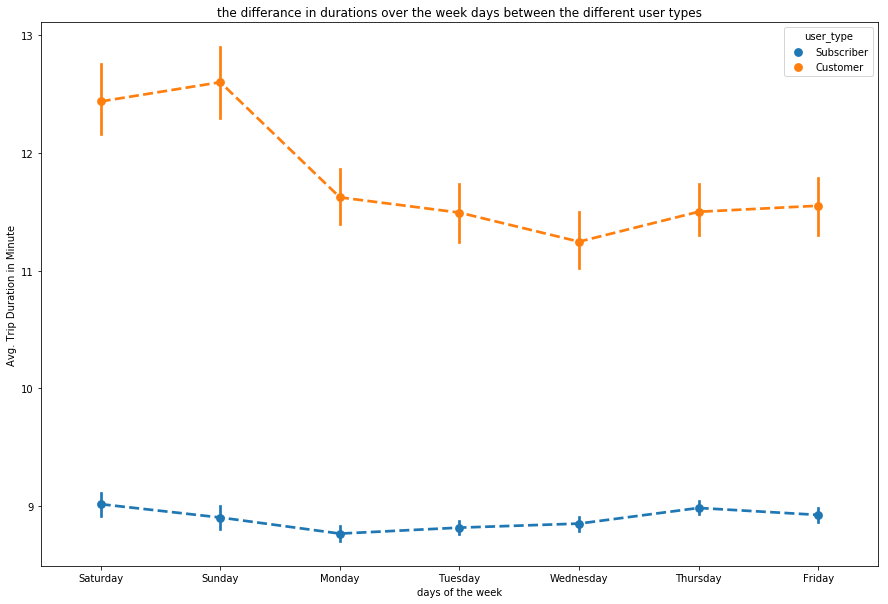

In [22]:
plt.figure(figsize=[15,10])

sb.pointplot(data=df, x='start_day', y='duration_min', hue='user_type', linestyles="--");
plt.xlabel('days of the week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('the differance in durations over the week days between the different user types');


### conclution: the duration of the trip for the user type: subscriber is always lower than the user type: customer over the week days

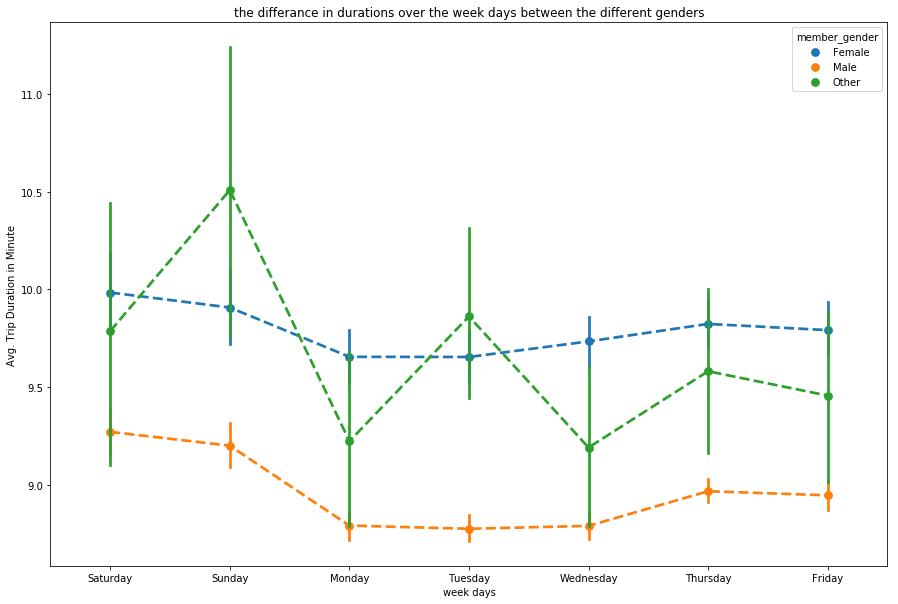

In [23]:
plt.figure(figsize=[15,10])

sb.pointplot(data=df, x='start_day', y='duration_min', hue='member_gender', linestyles="--");
plt.xlabel('week days');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('the differance in durations over the week days between the different genders');


### conclution: the duration of the trip for the males is always larger than the females over the week days while the others are in between.